# Neural Network for Cancer Prediction
The data used for this tutorial is an RNA-seq gene expression data for different cancer types. The rows represent cancer samples and the columns represent gene count values. The last column contains the cancer categories.

The original data can found here: https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq

## Required Libraries
 - numpy
 - matplotlib
 - pandas
 - tensorflow
 - keras
 - scikit-learn

## Import Python libraries

In [6]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense



## Read data

In [ ]:

#read data directly from a github repository
file_url='https://github.com/vappiah/Machine-Learning-Tutorials/raw/main/data/cancer_gene_expression.zip'

dataframe=pd.read_csv(file_url)


In [11]:
import pandas as pd

# Define the filenames
data_filename = 'data.csv'
labels_filename = 'labels.csv'

try:
    # --- 1. Load the gene expression data and the labels ---
    print(f"Loading gene expression data from '{data_filename}'...")
    data_df = pd.read_csv(data_filename)

    print(f"Loading labels from '{labels_filename}'...")
    labels_df = pd.read_csv(labels_filename)

    # --- 2. Data Cleaning: Remove the redundant 'Unnamed: 0' column ---
    # These datasets often have a first column that's just a row index.
    # We will check for and remove it from both dataframes if it exists.
    if 'Unnamed: 0' in data_df.columns:
        data_df = data_df.drop('Unnamed: 0', axis=1)

    if 'Unnamed: 0' in labels_df.columns:
        labels_df = labels_df.drop('Unnamed: 0', axis=1)

    # --- 3. Combine the two DataFrames side-by-side ---
    # 'axis=1' tells pandas to concatenate the columns horizontally.
    # This works because the rows in both files are in the same order.
    print("Combining the data and labels...")
    combined_df = pd.concat([data_df, labels_df], axis=1)

    # --- 4. Verification ---
    print("\nCombination successful!")
    print("\n--- Shape of the new combined DataFrame ---")
    # Expected output: (801, 20532) -> 801 samples, 20531 genes + 1 label column
    print(combined_df.shape)

    print("\n--- First 5 rows of the combined DataFrame ---")
    # Display the first few rows to visually confirm the merge.
    # You should see the 'Class' column at the far right.
    print(combined_df.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please make sure 'data.csv' and 'labels.csv' are in the same directory as your script.")

Loading gene expression data from 'data.csv'...
Loading labels from 'labels.csv'...
Combining the data and labels...

Combination successful!

--- Shape of the new combined DataFrame ---
(801, 20532)

--- First 5 rows of the combined DataFrame ---
   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
1  0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
2  0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
3  0.434882     0.0     0.0  ..

In [13]:
import pandas as pd

# Define the input and output filenames
data_filename = 'data.csv'
labels_filename = 'labels.csv'
output_filename = 'cancer_data_combined.csv'

try:
    # Load the gene expression data and the labels
    data_df = pd.read_csv(data_filename)
    labels_df = pd.read_csv(labels_filename)

    # Clean the 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in data_df.columns:
        data_df = data_df.drop('Unnamed: 0', axis=1)
    if 'Unnamed: 0' in labels_df.columns:
        labels_df = labels_df.drop('Unnamed: 0', axis=1)

    # Combine the two DataFrames
    combined_df = pd.concat([data_df, labels_df], axis=1)

    # Save the result to a new CSV file
    combined_df.to_csv(output_filename, index=False)

    print(f"Successfully loaded, combined, and saved the data to '{output_filename}'")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please make sure 'data.csv' and 'labels.csv' are in the same directory.")

Successfully loaded, combined, and saved the data to 'cancer_data_combined.csv'



## Data Exploration & Cleaning




In [17]:
file_path = '/content/cancer_data_combined.csv'
dataframe=pd.read_csv(file_path)

In [18]:
dataframe.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [19]:
#let's check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature

print(dataframe.shape)

(801, 20532)


In [20]:
#let's check some of the columns (first, second and third columns)
print(dataframe.columns[0:3])

Index(['gene_0', 'gene_1', 'gene_2'], dtype='object')


In [21]:
#lets check the name of the last column of this dataframe

dataframe.columns[-1]

'Class'

In [22]:
#check for missing values
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


**GOOD JOB!!!!.**

In [24]:
#let's check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels

print(dataframe['Class'].value_counts())

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


We can see that there are 5 classes/cancer types. And you can also see the number of samples diagnosed with a cancer type
      


## **Data preprocesing**
This is done to put the data in an appropriate format before modelling


In [25]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [26]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

\
**Data Splitting**\
Data is split into three: training, validation and test sets\
-training set is used for training\
-validation set is used for evaluating the model during training.\
-test set is used to test the model after training and tuning has been completed.

In [27]:
#split data into training,validation and test sets

#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

\
**Data Normalization**\
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias.\
Normalization is performed separately on each data set. This is done to prevent data leakage.

In [ ]:
### scale the data between 0-1

In [28]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

Original shape of training data: (512, 20531)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4371  4808  4809  4810  4814  4815  4816  4817  4828
  4831  5288  7262  7661  7662  7663  7664  7665  8121  9304  9306  9314
  9316  9320  9350  9452 10121 11958 12490 12513 12634 12649 12682 12709
 12719 12825 13991 14158 14159 14160 14161 15138 15140 15141 15446 15554
 16566 16567 16568 16569 16571 16572 16574 16575 16578 16579 16604 16634
 16637 16677 16697 16698 16699 16700 16701 16702 16704 16705 16706 16707
 16708 16709 16710 16711 16712 16713 16714 16715 16716 16717 16718 16719
 16720 16721 16722 16723 16724 16725 16726 16727 16728 16729 16730 16731
 16732 16733 16734 16735 16736 16737 16738 16739 16740 16741 16742 16743
 16744 16745 16746 16748 16749 16750 16751 16752 16753 16754 16756 16757
 16758 16759 16760 16761 16762 16763 16764 16765 16766 16767 16768 16769
 16770 16771 16772 16774 16775 16776 16777 16778 16779 16780 16781 16782
 16783


Successfully selected the top 500 features.
New shape of training data: (512, 500)
------------------------------------------------------------

--- Top 15 Most Influential Genes ---
           Gene        Score
257   gene_9175  3396.669811
258   gene_9176  2805.043310
10     gene_220  2504.184858
9      gene_219  2481.809251
456  gene_18135  1977.715001
350  gene_14114  1734.600111
386  gene_15895  1622.659441
408  gene_16169  1494.882911
215   gene_7421  1452.169969
389  gene_15898  1407.095123
341  gene_13818  1333.298365
191   gene_6733  1322.019719
100   gene_3439  1315.109393
14     gene_450  1296.049908
226   gene_7964  1286.768063
------------------------------------------------------------


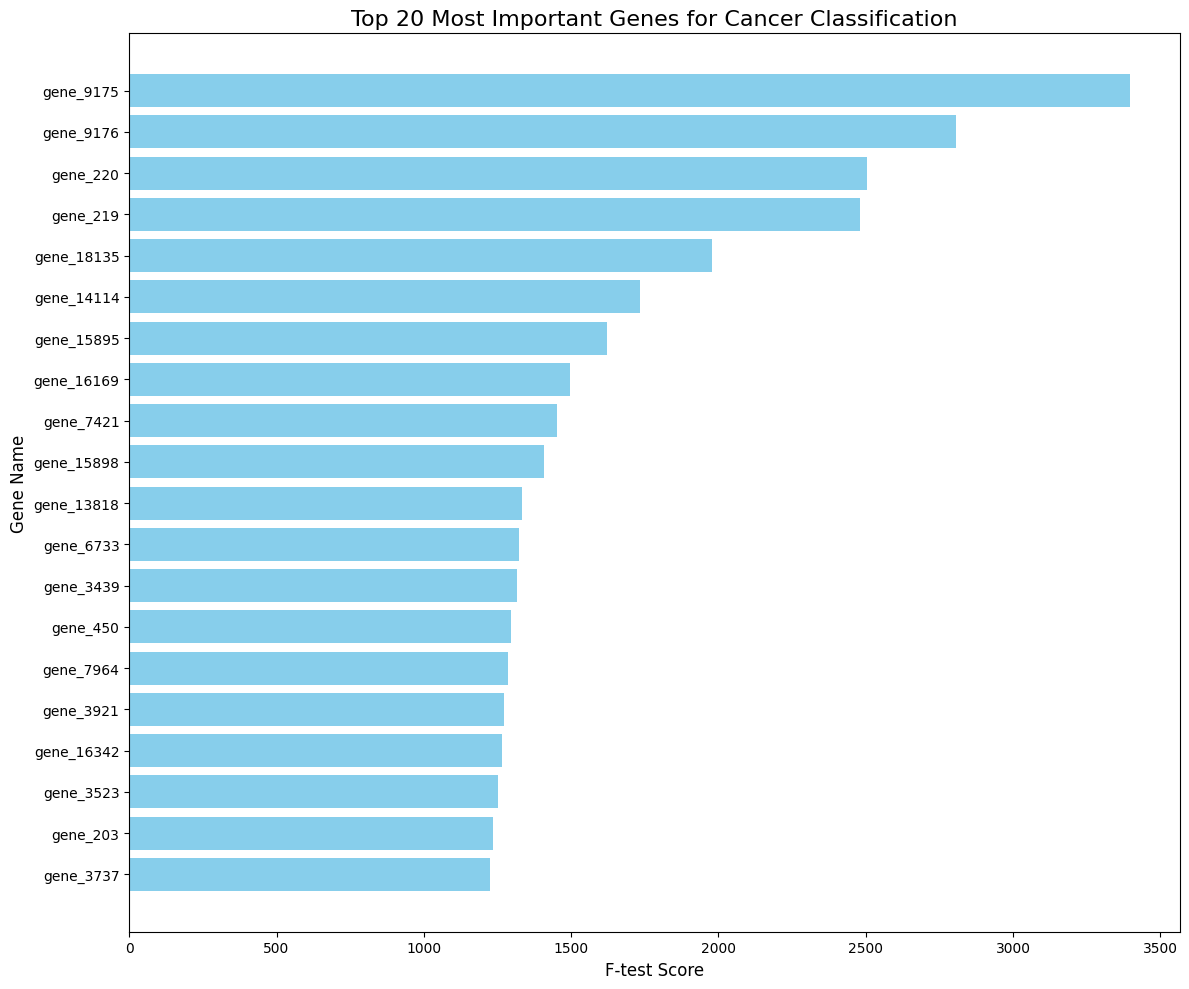

In [29]:
K_FEATURES_TO_SELECT = 500


# --- 2. Define and Apply the Feature Selector ---
print("Original shape of training data:", X_train.shape)

# Initialize the selector using the ANOVA F-test for classification
feature_selector = SelectKBest(score_func=f_classif, k=K_FEATURES_TO_SELECT)

# Fit the selector to the scaled training data and transform it
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Transform the validation and test sets using the same fitted selector
X_val_selected = feature_selector.transform(X_val)
X_test_selected = feature_selector.transform(X_test)

print(f"\nSuccessfully selected the top {K_FEATURES_TO_SELECT} features.")
print("New shape of training data:", X_train_selected.shape)
print("-" * 60)


# --- 3. Analyze the Selected Features ---
# Get the indices and scores of the selected features
selected_indices = feature_selector.get_support(indices=True)
scores = feature_selector.scores_[selected_indices]
names = X.columns[selected_indices]

# Create a DataFrame of the top features and their scores, then sort them
feature_scores = pd.DataFrame({'Gene': names, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("\n--- Top 15 Most Influential Genes ---")
print(feature_scores.head(15))
print("-" * 60)


# --- 4. Visualize the Top Features ---
# Create a bar plot of the top 20 features for better visualization
top_n = 20
plt.figure(figsize=(12, 10))
plt.barh(y=feature_scores['Gene'][:top_n], width=feature_scores['Score'][:top_n], color='skyblue')
plt.title(f'Top {top_n} Most Important Genes for Cancer Classification', fontsize=16)
plt.xlabel('F-test Score', fontsize=12)
plt.ylabel('Gene Name', fontsize=12)
plt.gca().invert_yaxis()  # Display the highest score on top
plt.tight_layout()
plt.show()

# The variables `X_train_selected` and `X_test_selected` are now ready for model training.

### Build the Neural Network Model

In [30]:
from keras.layers import BatchNormalization, Dropout

# --- 1. Define the Enhanced Model ---
model = Sequential()

# --- Input & First Hidden Layer ---
# The input_dim should match the number of features from SelectKBest
model.add(Dense(40, input_dim=X_train_selected.shape[1], activation='relu'))
# ADDED: Batch Normalization stabilizes the inputs to the next layer
model.add(BatchNormalization())
# ADDED: Dropout randomly deactivates 50% of neurons to prevent overfitting
model.add(Dropout(0.5))

# --- Second Hidden Layer ---
model.add(Dense(20, activation='relu'))
# ADDED: Batch Normalization layer
model.add(BatchNormalization())
# ADDED: Dropout with a slightly lower rate
model.add(Dropout(0.3))

# --- Output Layer ---
# The output layer has one neuron for each class, with softmax for probabilities
model.add(Dense(nclasses, activation='softmax'))

# --- 2. Compile the Model ---
# We can use the same trusted Adam optimizer and loss function
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=opt_adam,
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# --- 3. Print a Summary of the Model Architecture ---
# This is a great way to visualize the layers and see the number of parameters
print("--- Model Summary ---")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │        20,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,205 (82.83 KB)

 Trainable params: 21,085 (82.36 KB)

 Non-trainable params: 120 (480.00 B)

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --- 1. Define the Callbacks ---

# a) EarlyStopping
# This callback will monitor the validation loss and stop the training
# if it has not improved for a set number of epochs ('patience').
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=15,             # Number of epochs to wait for improvement
    verbose=1,               # Print a message when training is stopped
    restore_best_weights=True # Automatically restore the weights from the best epoch
)

# b) ModelCheckpoint
# This callback saves the model to a file, but only when the validation
# loss improves. This ensures you always have the best version saved.
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5', # Filename to save the best model
    monitor='val_loss',       # Metric to monitor
    save_best_only=True,      # Only save if the metric has improved
    verbose=1                 # Print a message when a new best model is saved
)

# c) ReduceLROnPlateau
# This callback will reduce the learning rate if the validation loss
# stops improving. This helps the model to fine-tune its weights.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,             # Reduce learning rate by a factor of 5 (e.g., 0.001 -> 0.0002)
    patience=5,             # Number of epochs to wait before reducing LR
    verbose=1,
    min_lr=0.00001          # A lower bound on the learning rate
)


# --- 2. Train the Model with the Callbacks ---
# We pass our list of callbacks to the .fit() method.
print("\n--- Starting Enhanced Model Training ---")
history = model.fit(
    X_train_selected,
    y_train,
    validation_data=(X_val_selected, y_val),
    batch_size=32,
    epochs=400,             # Set a high number; EarlyStopping will find the optimal number
    verbose=1,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

print("\n--- Training Finished ---")
print("The best version of the model has been automatically restored and is also saved as 'best_model.h5'")



--- Starting Enhanced Model Training ---
Epoch 1/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - loss: 1.9816 - sparse_categorical_accuracy: 0.2188
Epoch 1: val_loss improved from inf to 1.21474, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.5901 - sparse_categorical_accuracy: 0.4124 - val_loss: 1.2147 - val_sparse_categorical_accuracy: 0.4141 - learning_rate: 0.0010
Epoch 2/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4971 - sparse_categorical_accuracy: 0.8750
Epoch 2: val_loss improved from 1.21474 to 0.87446, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6254 - sparse_categorical_accuracy: 0.7971 - val_loss: 0.8745 - val_sparse_categorical_accuracy: 0.7812 - learning_rate: 0.0010
Epoch 3/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6957 - sparse_categorical_accuracy: 0.7500
Epoch 3: val_loss improved from 0.87446 to 0.65095, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5130 - sparse_categorical_accuracy: 0.8446 - val_loss: 0.6510 - val_sparse_categorical_accuracy: 0.8906 - learning_rate: 0.0010
Epoch 4/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4347 - sparse_categorical_accuracy: 0.8750
Epoch 4: val_loss improved from 0.65095 to 0.47253, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4295 - sparse_categorical_accuracy: 0.8987 - val_loss: 0.4725 - val_sparse_categorical_accuracy: 0.9297 - learning_rate: 0.0010
Epoch 5/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 0.5713 - sparse_categorical_accuracy: 0.7812
Epoch 5: val_loss improved from 0.47253 to 0.35580, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3706 - sparse_categorical_accuracy: 0.9100 - val_loss: 0.3558 - val_sparse_categorical_accuracy: 0.9922 - learning_rate: 0.0010
Epoch 6/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2804 - sparse_categorical_accuracy: 0.9375
Epoch 6: val_loss improved from 0.35580 to 0.21871, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3324 - sparse_categorical_accuracy: 0.9171 - val_loss: 0.2187 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 7/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3436 - sparse_categorical_accuracy: 0.9062
Epoch 7: val_loss improved from 0.21871 to 0.15092, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2790 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.1509 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 8/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2774 - sparse_categorical_accuracy: 1.0000
Epoch 8: val_loss improved from 0.15092 to 0.11998, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2723 - sparse_categorical_accuracy: 0.9539 - val_loss: 0.1200 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 9/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3369 - sparse_categorical_accuracy: 0.9375
Epoch 9: val_loss improved from 0.11998 to 0.08738, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2319 - sparse_categorical_accuracy: 0.9586 - val_loss: 0.0874 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 10/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1261 - sparse_categorical_accuracy: 1.0000
Epoch 10: val_loss improved from 0.08738 to 0.05950, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2170 - sparse_categorical_accuracy: 0.9591 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 11/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1751 - sparse_categorical_accuracy: 0.9688
Epoch 11: val_loss improved from 0.05950 to 0.04597, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1925 - sparse_categorical_accuracy: 0.9665 - val_loss: 0.0460 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 12/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2355 - sparse_categorical_accuracy: 1.0000
Epoch 12: val_loss improved from 0.04597 to 0.03213, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2009 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.0321 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 13/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.1317 - sparse_categorical_accuracy: 0.9688
Epoch 13: val_loss improved from 0.03213 to 0.02511, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1441 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.0251 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 14/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2035 - sparse_categorical_accuracy: 0.9688
Epoch 14: val_loss improved from 0.02511 to 0.01906, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1725 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.0191 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 15/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0901 - sparse_categorical_accuracy: 1.0000
Epoch 15: val_loss improved from 0.01906 to 0.01492, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1170 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.0149 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 16/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1991 - sparse_categorical_accuracy: 0.9375
Epoch 16: val_loss improved from 0.01492 to 0.01257, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1365 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0126 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 17/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1135 - sparse_categorical_accuracy: 0.9688
Epoch 17: val_loss improved from 0.01257 to 0.01046, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1218 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0105 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 18/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0840 - sparse_categorical_accuracy: 1.0000
Epoch 18: val_loss improved from 0.01046 to 0.00832, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0083 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 19/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0393 - sparse_categorical_accuracy: 1.0000
Epoch 19: val_loss improved from 0.00832 to 0.00728, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0686 - sparse_categorical_accuracy: 0.9957 - val_loss: 0.0073 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 20/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0939 - sparse_categorical_accuracy: 1.0000
Epoch 20: val_loss improved from 0.00728 to 0.00616, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0831 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0062 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 21/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0854 - sparse_categorical_accuracy: 1.0000
Epoch 21: val_loss improved from 0.00616 to 0.00583, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0058 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 22/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1072 - sparse_categorical_accuracy: 0.9688
Epoch 22: val_loss improved from 0.00583 to 0.00549, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0857 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.0055 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 23/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1086 - sparse_categorical_accuracy: 0.9688
Epoch 23: val_loss improved from 0.00549 to 0.00470, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0779 - sparse_categorical_accuracy: 0.9923 - val_loss: 0.0047 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 24/400
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9988 
Epoch 24: val_loss improved from 0.00470 to 0.00419, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0747 - sparse_categorical_accuracy: 0.9987 - val_loss: 0.0042 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 25/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1039 - sparse_categorical_accuracy: 1.0000
Epoch 25: val_loss improved from 0.00419 to 0.00389, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.0039 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 26/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1054 - sparse_categorical_accuracy: 1.0000
Epoch 26: val_loss improved from 0.00389 to 0.00331, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0730 - sparse_categorical_accuracy: 0.9924 - val_loss: 0.0033 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 27/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9688
Epoch 27: val_loss improved from 0.00331 to 0.00330, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0033 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 28/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0921 - sparse_categorical_accuracy: 1.0000
Epoch 28: val_loss improved from 0.00330 to 0.00313, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0693 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.0031 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 29/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0840 - sparse_categorical_accuracy: 0.9688
Epoch 29: val_loss improved from 0.00313 to 0.00243, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0624 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.0024 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 30/400
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0522 - sparse_categorical_accuracy: 1.0000 
Epoch 30: val_loss improved from 0.00243 to 0.00202, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0515 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0020 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 31/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1244 - sparse_categorical_accuracy: 0.9688
Epoch 31: val_loss improved from 0.00202 to 0.00184, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.0018 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 32/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0259 - sparse_categorical_accuracy: 1.0000
Epoch 32: val_loss improved from 0.00184 to 0.00172, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0498 - sparse_categorical_accuracy: 0.9869 - val_loss: 0.0017 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 33/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0292 - sparse_categorical_accuracy: 1.0000
Epoch 33: val_loss did not improve from 0.00172
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.0018 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 34/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0124 - sparse_categorical_accuracy: 1.0000
Epoch 34: val_loss improved from 0.00172 to 0.00154, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9948 - val_loss: 0.0015 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 35/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0355 - sparse_categorical_accuracy: 1.0000
Epoch 35: val_loss improved from 0.00154 to 0.00137, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0014 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 36/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0601 - sparse_categorical_accuracy: 1.0000
Epoch 36: val_loss improved from 0.00137 to 0.00121, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0012 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 37/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0371 - sparse_categorical_accuracy: 1.0000
Epoch 37: val_loss improved from 0.00121 to 0.00105, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.0010 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 38/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0230 - sparse_categorical_accuracy: 1.0000
Epoch 38: val_loss improved from 0.00105 to 0.00098, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9975 - val_loss: 9.8207e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 39/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0344 - sparse_categorical_accuracy: 1.0000
Epoch 39: val_loss improved from 0.00098 to 0.00084, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0523 - sparse_categorical_accuracy: 0.9919 - val_loss: 8.3911e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 40/400
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - sparse_categorical_accuracy: 1.0000 
Epoch 40: val_loss improved from 0.00084 to 0.00075, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0305 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.5043e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 41/400
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9873 
Epoch 41: val_loss improved from 0.00075 to 0.00072, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0496 - sparse_categorical_accuracy: 0.9891 - val_loss: 7.2247e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 42/400
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0420 - sparse_categorical_accuracy: 0.9939 
Epoch 42: val_loss did not improve from 0.00072
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9939 - val_loss: 7.8474e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 43/400
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9947 
Epoch 43: val_loss did not improve from 0.00072
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0389 - sparse_categorical_accuracy: 0.9944 - val_loss: 8.8583e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 44/400
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0286 - sparse_categorical_accuracy: 0.9944 
Epoch 44: val_loss did not improve from 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0347 - sparse_categorical_accuracy: 0.9989 - val_loss: 6.9626e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 2.0000e-04
Epoch 49/400
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0372 - sparse_categorical_accuracy: 0.9917 
Epoch 49: val_loss improved from 0.00070 to 0.00068, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9929 - val_loss: 6.7873e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 2.0000e-04
Epoch 50/400
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - sparse_categorical_accuracy: 0.9982 
Epoch 50: val_loss improved from 0.00068 to 0.00068, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0216 - sparse_categorical_accuracy: 0.9979 - val_loss: 6.7751e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 2.0000e-04
Epoch 51/400
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9920 
Epoch 51: val_loss improved from 0.00068 to 0.00065, saving model to best_model.h5



Epoch 51: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9918 - val_loss: 6.5198e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 2.0000e-04
Epoch 52/400
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9875 
Epoch 52: val_loss improved from 0.00065 to 0.00065, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - sparse_categorical_accuracy: 0.9869 - val_loss: 6.4837e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 4.0000e-05
Epoch 53/400
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0333 - sparse_categorical_accuracy: 0.9974 
Epoch 53: val_loss did not improve from 0.00065
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0339 - sparse_categorical_accuracy: 0.9970 - val_loss: 6.7337e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 4.0000e-05
Epoch 54/400
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0350 - sparse_categorical_accuracy: 0.9950 
Epoch 54: val_loss did not improve from 0.00065
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9952 - val_loss: 6.8800e-04 - val_sparse_categorical_accuracy: 1.0000 - learning_rate: 4.0000e-05
Epoch 55/400
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.1106 - sparse_categorical_accuracy: 0.9375
Epoch 55: val_loss did not 

In [32]:
predictions = model.predict(X_test_selected)
_, accuracy = model.evaluate(X_test_selected, y_test, verbose=0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [33]:
#get the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:2 ,actual:2
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:4 ,actual:4


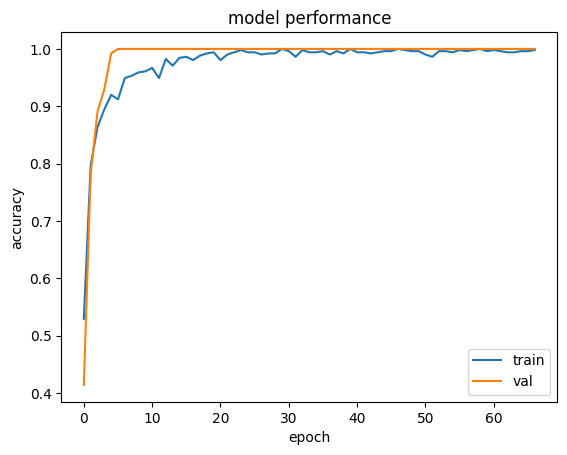

In [34]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


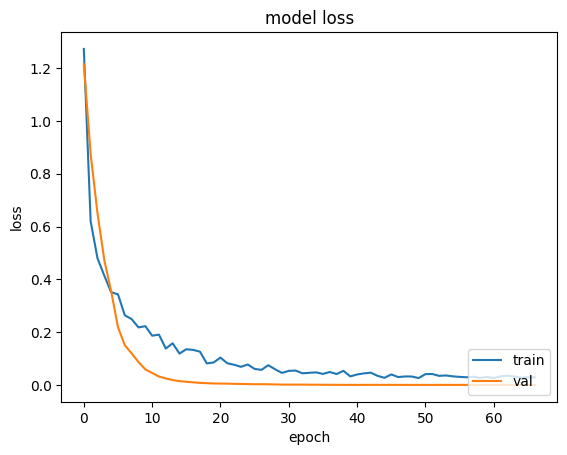

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Classification Report
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        74
        COAD       1.00      1.00      1.00        11
        KIRC       1.00      1.00      1.00        27
        LUAD       1.00      1.00      1.00        22
        PRAD       1.00      1.00      1.00        27

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161


Confusion Matrix


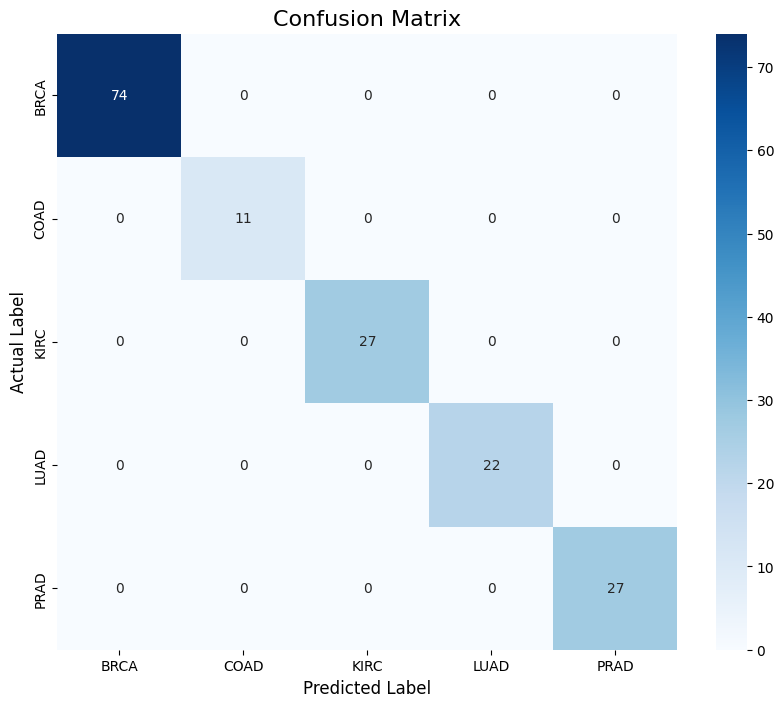

In [36]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# --- 1. Get Predicted Class Labels ---
# The 'predictions' variable contains the probability for each class. We need to
# select the class with the highest probability for each sample.
predicted_labels = np.argmax(predictions, axis=1)

# --- 2. Generate and Print Classification Report ---
print("="*60)
print("Classification Report")
print("="*60)
# This report shows the main classification metrics on a per-class basis.
# 'target_names=labels' uses your original cancer type names for clarity.
print(classification_report(y_test, predicted_labels, target_names=labels))


# --- 3. Generate and Plot Confusion Matrix ---
print("\n" + "="*60)
print("Confusion Matrix")
print("="*60)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Use a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,     # Show the numbers in each cell
            fmt='d',        # Format as integer
            cmap='Blues',   # Color scheme
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()